In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv('DataSet/TelcoCustomerChurn.csv')

# 1. 자료정리

 - 전처리.

In [4]:
data.info()
# gender : gender info
# SeniorCitizen : senior or not
# Partner whether the partner has partner or not
# dependents :
# tenure : company span

# Contract : period

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
missing_count = data.isna().any(axis=1).sum()
print("missing_count : ",missing_count)

missing_count :  0


In [6]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
#Labeling

category_label = ["SeniorCitizen",
                                 "Partner",
                                "Dependents",
                                "Contract",
                                "PaperlessBilling",
                                "PaymentMethod",
                                "PhoneService",
                                "MultipleLines",
                                "InternetService",
                                "OnlineSecurity",
                                "OnlineBackup",
                                "DeviceProtection",
                                "TechSupport",
                                "StreamingTV",
                                "StreamingMovies",
                  "gender",
                  "Churn"]


continuous_label = ["tenure", "MonthlyCharges","TotalCharges"]

In [8]:
#data['TotalCharges']=data.TotalCharges.astype(float)
try:
    data['tenure']=pd.to_numeric(data['tenure'])
    data['MonthlyCharges']=pd.to_numeric(data['MonthlyCharges'])
    data['TotalCharges']=pd.to_numeric(data['TotalCharges'])
except Exception as e:
    print (e)

Unable to parse string " " at position 488


In [9]:
index_temp = data['TotalCharges']==" " 
indexSet = [i for i,x in enumerate(index_temp) if x]
data=data.drop(index=indexSet,axis=0)

In [10]:
data.reset_index(drop=True,inplace=True)

In [11]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'])

# 2. Summary Stats

In [12]:
data_copy = data.copy()

In [13]:
data_dummied = pd.get_dummies(data_copy, columns=category_label, drop_first=True)

# 3. Variation Inflation Factor

In [14]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(features):
    features=sm.add_constant(features)
    features.dropna(inplace=True)
    
    vif = pd.DataFrame([variance_inflation_factor(features.values, i)
                       for i in range(features.shape[1])],columns=['VIF'])
    vif.index = features.columns
    return vif



data_id = data_dummied.pop("customerID")
vif_return=vif(data_dummied)


In [15]:
print(vif_return)
#vif_drop=[print(str1,i) for i, str1 in enumerate(vif_return.index) if vif_return[i]>10]
vif_drop=[print(str1,i) for i, str1 in enumerate(vif_return.index)]


                                              VIF
const                                    0.000000
tenure                                   7.601061
MonthlyCharges                         866.100958
TotalCharges                            10.883913
SeniorCitizen_1                          1.155144
Partner_Yes                              1.462989
Dependents_Yes                           1.382213
Contract_One year                        1.639004
Contract_Two year                        2.658720
PaperlessBilling_Yes                     1.211939
PaymentMethod_Credit card (automatic)    1.561044
PaymentMethod_Electronic check           1.983325
PaymentMethod_Mailed check               1.857116
PhoneService_Yes                              inf
MultipleLines_No phone service                inf
MultipleLines_Yes                        7.295768
InternetService_Fiber optic            148.578927
InternetService_No                            inf
OnlineSecurity_No internet service            inf


In [16]:
vif_drop=[str1 for i, str1 in enumerate(vif_return.index) if vif_return['VIF'][i]>10]

In [17]:
print("Drop List : ",vif_drop)

data_dummied_copy=data_dummied.copy()
for str in vif_drop:
    data_dummied_copy.pop(str)
    
print(data_dummied_copy)

Drop List :  ['MonthlyCharges', 'TotalCharges', 'PhoneService_Yes', 'MultipleLines_No phone service', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes']
      tenure  SeniorCitizen_1  Partner_Yes  Dependents_Yes  Contract_One year  \
0          1                0            1               0                  0   
1         34                0            0               0                  1   
2          2                0            0               0                  0   
3         45                0            0               0                  1   
4          2                0            0               0                  0   
...      ...              ...          ...             ...                ...   
7027      24 

In [18]:
data_dummied_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   tenure                                 7032 non-null   int64
 1   SeniorCitizen_1                        7032 non-null   uint8
 2   Partner_Yes                            7032 non-null   uint8
 3   Dependents_Yes                         7032 non-null   uint8
 4   Contract_One year                      7032 non-null   uint8
 5   Contract_Two year                      7032 non-null   uint8
 6   PaperlessBilling_Yes                   7032 non-null   uint8
 7   PaymentMethod_Credit card (automatic)  7032 non-null   uint8
 8   PaymentMethod_Electronic check         7032 non-null   uint8
 9   PaymentMethod_Mailed check             7032 non-null   uint8
 10  MultipleLines_Yes                      7032 non-null   uint8
 11  OnlineSecurity_Yes            

# (1) Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
# if we use GridSearchCV : max_depth, ccp_alpha -> optimization is needed


In [20]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

#Split data
X= sm.add_constant(data_dummied_copy)# Add Constant
y= X.pop("Churn_Yes")
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=42)

In [21]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train,y_train)

y_train_pred = dt_clf.predict(X_train)
y_test_pred = dt_clf.predict(X_test)

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

cv=16

#Scoring
scoring='accuracy'

C=np.logspace(-4,5,20)

# ccp_alpha / max_depth
#ccp_alpha = np.linspace(1,10,9)
max_depth = np.linspace(1,10,10)
min_samples_leaf = np.linspace(1,5,5)
min_samples_split = np.linspace(1,5,5)
#ccp_alpha
#min_samples_leaf/min_samples_split -> ?

#param_grid =[{"max_depth":max_depth,"min_samples_leaf":min_samples_leaf,"min_samples_split":min_samples_split}]
param_grid =[{"max_depth":max_depth}]
gs=GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid,cv=cv,
                scoring=scoring,return_train_score=True)

gs.fit(X_train,y_train)

GridSearchCV(cv=16, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])}],
             return_train_score=True, scoring='accuracy')

In [24]:
path = dt_clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.94042585e-07 2.82170228e-06 8.34348173e-06 9.87595797e-06
 1.12868091e-05 1.58015327e-05 1.58015327e-05 1.58015327e-05
 1.58015327e-05 1.58015327e-05 1.91533730e-05 1.97519159e-05
 2.10687103e-05 2.25736182e-05 2.29840476e-05 2.37022991e-05
 2.37022991e-05 2.37022991e-05 2.37022991e-05 2.70883419e-05
 2.96278739e-05 3.16030655e-05 3.16030655e-05 3.52712785e-05
 3.55534487e-05 3.55534487e-05 3.63435253e-05 3.95038319e-05
 3.95038319e-05 3.95038319e-05 3.95038319e-05 4.10839851e-05
 4.39694824e-05 4.51472364e-05 4.51472364e-05 4.74045982e-05
 5.26717758e-05 5.30401099e-05 5.40305693e-05 5.41766837e-05
 5.53053646e-05 5.71394711e-05 5.82161733e-05 5.83441209e-05
 5.92557478e-05 5.92557478e-05 6.09487692e-05 6.32061310e-05
 6.32061310e-05 6.32061310e-05 6.32061310e-05 7.37404862e-05
 7.61859615e-05 7.90076637e-05 7.90076637e-05 7.90076637e-05
 7.90076637e-05 7.900766

In [25]:
dt_clfs = []
for ccp_alpha in ccp_alphas:
    tClf = DecisionTreeClassifier(random_state=42,ccp_alpha=ccp_alpha)
    tClf.fit(X_train,y_train)
    dt_clfs.append(tClf)

In [26]:
node_counts = [clf.tree_.node_count for clf in dt_clfs]
depth = [clf.tree_.max_depth for clf in dt_clfs]

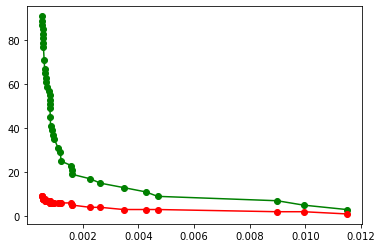

In [27]:


fig= plt.figure()
ax = fig.add_subplot(1,1,1)

minval = 370
plt.plot(ccp_alphas[minval:-1], node_counts[minval:-1], color='green',marker='o', linestyle='solid',label='noce_counts')
plt.plot(ccp_alphas[minval:-1], depth[minval:-1], color='red',marker='o', linestyle='solid',label='Depth')


In [28]:
len(ccp_alphas)

409

In [29]:
from sklearn.metrics import accuracy_score

train_acc=[]
test_acc=[]
for clf in dt_clfs:
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

In [35]:
ax[0][0]

<AxesSubplot:>

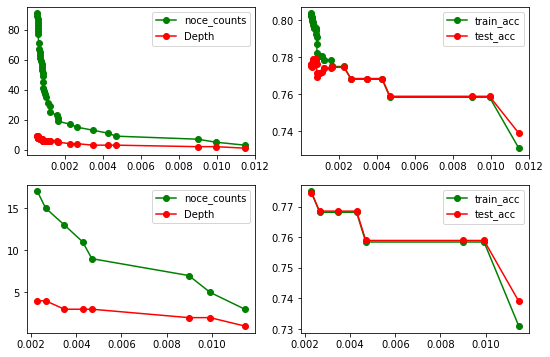

In [38]:
#fig= plt.figure()
#ax = fig.add_subplot(1,2,1)
fig, ax =plt.subplots(2,2,figsize=(9,6))

minval = 370
maxval = -1
ax[0][0].plot(ccp_alphas[minval:maxval], node_counts[minval:maxval], color='green',marker='o', linestyle='solid',label='noce_counts')
ax[0][0].plot(ccp_alphas[minval:maxval], depth[minval:maxval], color='red',marker='o', linestyle='solid',label='Depth')
ax[0][0].legend(loc='upper right')

ax[0][1].plot(ccp_alphas[minval:maxval], train_acc[minval:maxval], color='green',marker='o', linestyle='solid',label='train_acc')
ax[0][1].plot(ccp_alphas[minval:maxval], test_acc[minval:maxval], color='red',marker='o', linestyle='solid',label='test_acc')
ax[0][1].legend(loc='upper right')

minval=400
maxval=-1

ax[1][0].plot(ccp_alphas[minval:maxval], node_counts[minval:maxval], color='green',marker='o', linestyle='solid',label='noce_counts')
ax[1][0].plot(ccp_alphas[minval:maxval], depth[minval:maxval], color='red',marker='o', linestyle='solid',label='Depth')
ax[1][0].legend(loc='upper right')

ax[1][1].plot(ccp_alphas[minval:maxval], train_acc[minval:maxval], color='green',marker='o', linestyle='solid',label='train_acc')
ax[1][1].plot(ccp_alphas[minval:maxval], test_acc[minval:maxval], color='red',marker='o', linestyle='solid',label='test_acc')
ax[1][1].legend(loc='upper right')


In [39]:
dtf_Clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.006, max_depth=5)
dtf_Clf.fit(X_train,y_train)
y_train_pred = dtf_Clf.predict(X_train)
y_test_pred = dtf_Clf.predict(X_test)

데이터셋이 불균형하면 accuracy보다 f1이 나은가?

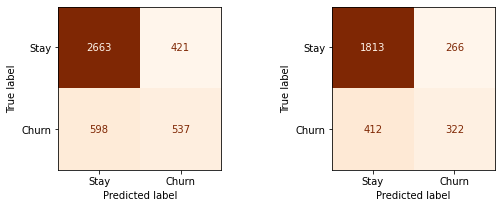

In [41]:
fig, ax =plt.subplots(1,2,figsize=(9,3))
ConfusionMatrixDisplay.from_predictions(y_train,dtf_Clf.predict(X_train),
                                       colorbar=False, ax=ax[0],cmap=plt.cm.Oranges,
                                       display_labels=['Stay','Churn'])

ConfusionMatrixDisplay.from_predictions(y_test,dtf_Clf.predict(X_test),
                                       colorbar=False, ax=ax[1],cmap=plt.cm.Oranges,
                                       display_labels=['Stay','Churn'])